
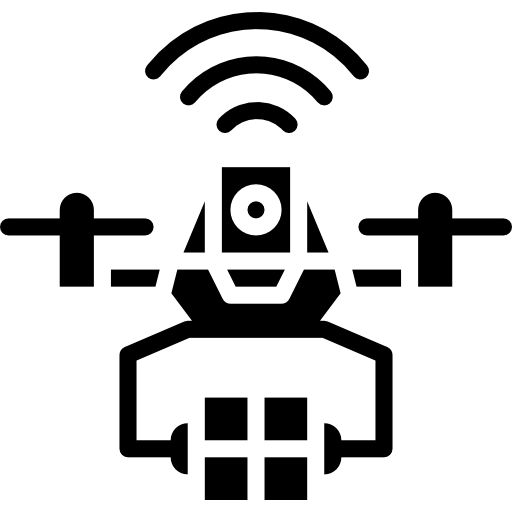


# DRONE DELIVERY


                                    
# Introduction 
### Objectives 

 

Over the last few years, drones have been deployed to support delivery, according to COVID-19 pandemic which has taken a significant toll on people all over the world. Drones have helped people to comply with social distancing rules, as they provide contact-free delivery services. 

  

 In addition, drones help with transportation in many ways, such as avoiding traffic congestion, allowing for faster deliveries, and providing lower transportation costs. In contrast with truck delivery, which can work over a longer range, as it is fuel-based, and trucks can carry heavy and large wight whereas the drones cannot. Nonetheless, traditional truck delivery is slow and has high transportation costs. As a team we have chosen drone delivery over truck deliver because it could minimize the total operational costs and time.  

  

However, we intend to cover the abstraction of this problem by ignoring the effects of the drone such as limit for the shipment weight, as drones cannot carry heavy wights, drones are battery-powered, thereby limiting their delivery ranges and we are not going to consider the charging process. In this project we will discuss a problem of Drone Delivery and try to solve it using the A* algorithm. 

 

 

 
 

 

 

## Our problem 
### Explain the problem        


Drone Delivery is graph problem implemented using A* algorithm, it defined on graph G=(V, A) where A is a set of arcs, each of which links two nodes in V, as V = {0, . . ., n + 1}, where nodes 0 represent the start point which is the warehouse of the shipments that drone’s start point and n + 1 represent the end point where is the drone depot after it delivers all the shipments to the all-customer locations, the nodes 1, . . ., n are customer locations. The set of customers is represented by N = {1, . . ., n}. 

  

The objective of this implementation is to find the tour with the shortest delivery path such that all customer locations are served by the drone. The pickup and delivery path. 

  

#### There are additional constraints that need to be considered: 

• The drone must start from the warehouse and ends in the drone depot. 

• Houses can only be served once.  

• The drone cannot go to the depot unless it serves all the {1, . . ., n} Houses locations. 

• In each node aka "n" the drone looks for the next node that seems closest to the node "n" at this moment.  

• The drone does not have a rendezvous node before the drone depot node. 

 


  

 
 

 

## problem formulation  


In order to understand the problem and simplify it, we must strip it of other details as we mentioned above such as the speed of the drone, delivery path congestion, weather, stopping to fill up battery ... etc. 

#### Problem formulation 
o Initial state : Warehouse

o Actions : Go from warehouse/houses 

o State space : each house that will be delivered, Warehouse and depot 

o Goal test : reach the depot in min Time and all target houses are covered. 

 





 


# A* Algorithm 

 

It’s an Artificial Intelligence Algorithm used to find the shortest possible path from start to end state. 

In our problem, we are trying to apply this algorithm with multiple heuristics function to achieve the goal with other preferences. The comparison between heuristics will be discussed later. 



 ### Implementation 

 

In [ ]:
class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis
 
    def get_neighbors(self, v):
        return self.adjac_lis[v]

#### This is heuristic function which is having equal values for all nodes

In [ ]:
 def h(self, n):
        H = {
            'Source': 1,
            'House1': 1,
            'House2': 1,
            'House3': 1,
            'Destination': 1
        }
 
        return H[n]

#### In this open_lst is a lisy of nodes which have been visited, but who's neighbours haven't all been always inspected, It starts off with the start node And closed_lst is a list of nodes which have been visited and who's neighbors have been always inspected

In [ ]:

    def a_star_algorithm(self, start, stop):
      
        open_lst = set([start])
        closed_lst = set([])

#### poo has present distances from start to all other nodes , the default value is +infinity

In [ ]:
poo = {}
        poo[start] = 0
        total=0

#### par contains an adjac mapping of all nodes

In [ ]:
par = {}
        par[start] = start
 
        while len(open_lst) > 0:
            n = None

#### it will find a node with the lowest value of f() -

In [ ]:
for v in open_lst:
                if n == None or poo[v] + self.h(v) < poo[n] + self.h(n):
                    n = v;
 
            if n == None:
                print('Path does not exist!')
                return None

#### if the current node is the stop ,then we start again from start

In [ ]:
if n == stop:
                reconst_path = []
 
                while par[n] != n:
                    reconst_path.append(n)
                    n = par[n]
 
                reconst_path.append(start)
 
                reconst_path.reverse()
 
                print('Path found: {}'.format(reconst_path))
     
                return reconst_path
 

#### for all the neighbors of the current node do -> if the current node is not presentin both open_lst and closed_lst add it to open_lst and note n as it's par

In [ ]:
for (m, weight) in self.get_neighbors(n):
              
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    poo[m] = poo[n] + weight
                  

#### otherwise, check if it's quicker to first visit n, then m and if it is, update par data and poo data and if the node was in the closed_lst, move it to open_lst

In [ ]:
   else:
                    if poo[m] > poo[n] + weight:
                        poo[m] = poo[n] + weight
                        par[m] = n
                        print('The cost = ' , poo[m])
                        
          
                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)
                         

#### remove n from the open_lst, and add it to closed_lst because all of his neighbors were inspected

In [ ]:
open_lst.remove(n)
            closed_lst.add(n)
             
    
        print('Path does not exist!')
        return None

#### References and resources :
